In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Начальные условия
x0, y0 = 0, 1
b, yb = 1, 2
# y'' + x * y' + y = x
# y'' + p(x)*y' + q(x)*y = f(x)
p = lambda x: x
q = lambda x: 1
f = lambda x: x

n = 5  # назначим количество шагов
h = (b - x0) / n

In [3]:
x = x0
y = y0

left = np.zeros((n+1, n+1))
right = np.zeros((n+1, 1))

left[0,0] = 1
right[0,0] = y0
left[n,n] = 1
right[n,0] = yb
# Найдём коэффициенты для СЛАУ, заполним левую и 
# правую часть матрицы
for i in range(1, n):
    x += h
    left[i, i - 1] = 1 - p(x) * h / 2
    left[i, i] = q(x) * h ** 2 - 2
    left[i, i+1] = 1 + p(x) * h / 2
    right[i, 0] = f(x) * h ** 2
    
left

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.98, -1.96,  1.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.96, -1.96,  1.04,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.94, -1.96,  1.06,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.92, -1.96,  1.08],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [4]:
# Решим матричное уравнение => найдём все значения  y  в узлах
Y = np.linalg.solve(left, right)
y_all = np.squeeze(np.asarray(Y))
x_all = np.arange(x0, b+.5*h, h)

In [5]:
# Вывод таблицы
d = {'x': x_all, 
     'y': y_all}
pd.DataFrame(d)

x         y
0  0.0  1.000000
1  0.2  1.324843
2  0.4  1.592835
3  0.6  1.794334
4  0.8  1.927953
5  1.0  2.000000

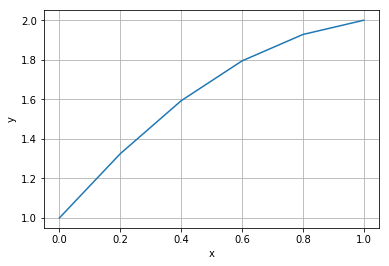

In [6]:
# Построение графика
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt, = plt.plot(x_all, y_all)